In [6]:
import numpy as np
import matplotlib.pyplot as plt

from neural_nets.NonLinearNet import NonLinearNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


X_val :
[[-0.26940074 -0.04009734]
 [-0.94881176 -0.64869939]
 [-0.53281087 -0.93636099]
 [-0.89424617 -0.03003317]
 [ 0.32825155  0.48446877]
 [-0.377347    0.03567076]
 [ 0.89932296 -0.83380419]
 [ 0.9113133  -0.62170761]
 [-0.17928851  0.02789759]
 [-0.20224099  0.07434525]]
y expected:
[[-0.49870413]
 [-1.24892413]
 [-0.12926074]
 [-1.75845917]
 [ 0.17203433]
 [-0.79036475]
 [ 2.63245012]
 [ 2.44433422]
 [-0.38647461]
 [-0.47882723]]
y get:
[[-0.51306667]
 [-1.25269008]
 [-0.12176771]
 [-1.73512161]
 [ 0.17162895]
 [-0.80956587]
 [ 2.47858215]
 [ 2.32806559]
 [-0.39898   ]
 [-0.4941863 ]]


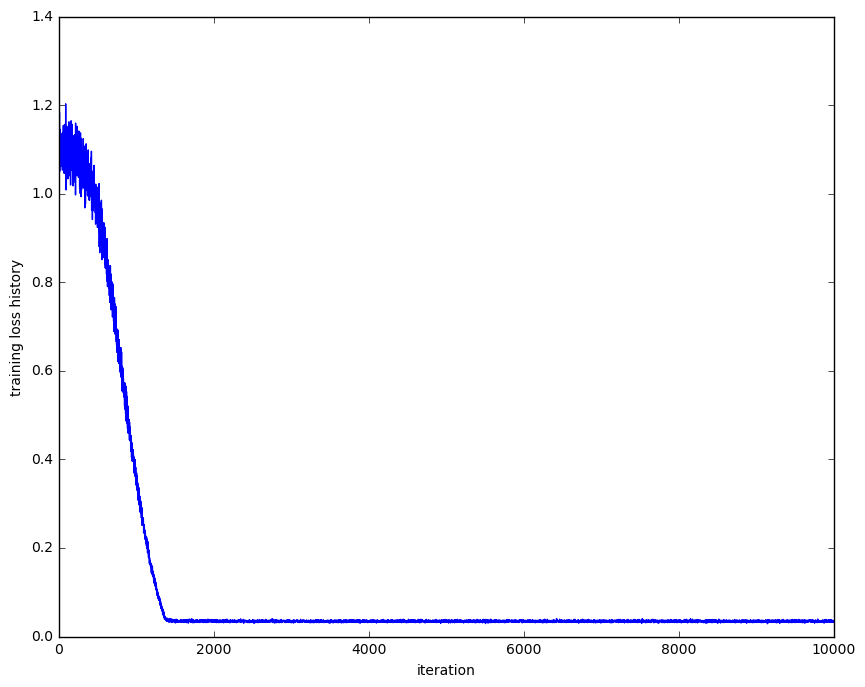

In [7]:
import math
data_size = 10000
X = np.random.ranf((data_size, 2)) * 2 - 1
y = np.zeros((data_size, 1))
for i in xrange(data_size):
    y[i] = 2 * X[i, 0] - 1 * X[i, 1]
    #y[i] = 0.5 * math.pi * (X[i, 0] ** 2) * math.sin(2 * math.pi * X[i, 1])
# split to train and validation set
X_train = X[:(int)(0.8 * X.shape[0])]
X_val  = X[(int)(0.8 * X.shape[0]):]
y_train = y[:(int)(0.8 * y.shape[0])]
y_val = y[(int)(0.8 * y.shape[0]):]

net = NonLinearNet(2, 30, 1, std=1e-2)
net.forward(X)
loss_history = net.train(X, y, X_val, y_val,
            learning_rate=1e-1, reg=0.001,
            num_iters=10000, verbose=False)

# plot the loss history
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('training loss history')
plt.show()